# [Downloading the Dataset](https://www.kaggle.com/tondji/jobs-data-for-recommender-systems)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "richadwivedi"
os.environ['KAGGLE_KEY'] = "1462d815580695348ef4bf8d3edfbfbe"

!kaggle datasets download -d tondji/jobs-data-for-recommender-systems


 56% 9.00M/16.0M [00:00<00:00, 23.4MB/s]
100% 16.0M/16.0M [00:00<00:00, 35.7MB/s]


In [ ]:
from zipfile import ZipFile

with ZipFile('jobs-data-for-recommender-systems.zip', 'r') as zipObj:
   zipObj.extractall()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Impoting Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as map
import matplotlib.pyplot as plt
import re
from nltk.tokenize import word_tokenize
import nltk
import operator
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 


#To ignore warnings.
import warnings
warnings.filterwarnings('ignore')

#saving model
from sklearn.externals import joblib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Loading the Dataset




In [ ]:
df_all_offers = pd.read_csv('ALL_Offers.csv')

In [ ]:
df_offers = pd.read_csv('offers.csv')

In [ ]:
df_org = pd.read_csv('organizations.csv')

# Exploratory Data Analysis

 Data Analysis of All_offers.csv

---



In [ ]:
#Let's understand the data
df_all_offers.head()

,posted_by_id,status,city,job_title,organization_id,contracts,description,skills
0,1,published,Bondues,Stagiaire (H/F) Assistant Marketing Nutritionnel,1,Stage6mois,Entreprise Le Groupe LACTALIS (près de ...,{'skills': {'communication': 1}}
1,2,published,Rhône,Expert process traitement thermique h/f,2,CDI,Entreprise Filiale européenne du groupe...,"{'skills': {'communication': 1, 'consulting': ..."
2,3,published,Paris,Charge d'operation grands comptes h/f,3,CDI,"Entreprise Notre client, première socié...","{'skills': {'collaboration': 1, 'reporting': 1..."
3,4,published,Rueil-Malmaison,Ingénieur Génie Civil stage F/H,4,Stage6mois,Entreprise Acteur mondial et leader eur...,"{'skills': {'collaboration': 1, 'ensemble': 1,..."
4,5,published,Levallois-Perret,Chargé pricing H/F,5,CDI,"Entreprise ALLIANCE AUTOMOTIVE France, ...","{'skills': {'collaboration': 1, 'leadership': 1}}"


In [ ]:
#Number of Rows in the dataset
print("Number of Rows are:",df_all_offers.shape[0])

Number of Rows are: 8867


In [ ]:
#Number of Columns/features in dataset
print("Number of Columns are:",df_all_offers.shape[1])

Number of Columns are: 8


In [ ]:
#List of Available features in dataset
print("Available Features are:",df_all_offers.columns.tolist())

Available Features are: ['posted_by_id', 'status', 'city', 'job_title', 'organization_id', 'contracts', 'description', 'skills']


In [ ]:
# Let's checkout which feature contains which kind of values i.e int /float /etc or what is the data type of values.
print(df_all_offers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8867 entries, 0 to 8866
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   posted_by_id     8867 non-null   int64 
 1   status           8867 non-null   object
 2   city             8867 non-null   object
 3   job_title        8867 non-null   object
 4   organization_id  8867 non-null   int64 
 5   contracts        8867 non-null   object
 6   description      8867 non-null   object
 7   skills           8867 non-null   object
dtypes: int64(2), object(6)
memory usage: 554.3+ KB
None


In [ ]:
#Checking is their any missing values are available in the dataset

print("Missing values:\n ",df_all_offers.isnull().sum())


Missing values:
  posted_by_id       0
status             0
city               0
job_title          0
organization_id    0
contracts          0
description        0
skills             0
dtype: int64


In [ ]:
# check for duplicate values
df_all_offers.duplicated().sum()


141

In [ ]:
#checing number of unique values available in each column
df_all_offers.nunique()

posted_by_id       1345
status                1
city               1020
job_title          6770
organization_id    1345
contracts            52
description        8707
skills             2950
dtype: int64

Data Analysis of offers.csv

---



In [ ]:
#Let's understand the data
df_offers.head()

,user_id,status,city,job_title,organization_id,contracts,description,skills
0,55,published,HOMERVILLE,Medical Receptionist,0,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'training': 1, 'certifications': 1..."
1,90,published,DEMOTTE,Clinical Research Associate,1,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'hardware': 2, 'communication': 1,..."
2,2,published,CARY,Territory Sales Representative,2,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'communication': 4, 'e-commerce': 1}}"
3,3,published,SKOWHEGAN,Bus Driver,3,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'mobile': 1, 'communication': 2, '..."
4,4,published,HOLLISTER,Foreign Service Officer,4,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'training': 4, 'designer': 1, 'pro..."


In [ ]:
#Number of Rows in the dataset
print("Number of Rows are:",df_offers.shape[0])

Number of Rows are: 252


In [ ]:
#Number of Columns/features in dataset
print("Number of Columns are:",df_offers.shape[1])

Number of Columns are: 8


In [ ]:
#List of Available features in dataset
print("Available Features are:",df_offers.columns.tolist())

Available Features are: ['user_id', 'status', 'city', 'job_title', 'organization_id', 'contracts', 'description', 'skills']


In [ ]:
# Let's checkout which feature contains which kind of values i.e int /float /etc or what is the data type of values.
print(df_offers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          252 non-null    int64 
 1   status           252 non-null    object
 2   city             252 non-null    object
 3   job_title        252 non-null    object
 4   organization_id  252 non-null    int64 
 5   contracts        252 non-null    object
 6   description      252 non-null    object
 7   skills           252 non-null    object
dtypes: int64(2), object(6)
memory usage: 15.9+ KB
None


In [ ]:
#Checking is their any missing values are available in the dataset

print("Missing values:\n ",df_offers.isnull().sum())

Missing values:
  user_id            0
status             0
city               0
job_title          0
organization_id    0
contracts          0
description        0
skills             0
dtype: int64


In [ ]:
# check for duplicate values
df_offers.duplicated().sum()

0

In [ ]:
#checing number of unique values available in each column
df_offers.nunique()

user_id            200
status               1
city               213
job_title          222
organization_id    200
contracts            1
description          1
skills             151
dtype: int64

Data Analysis of Users.csv

---



In [ ]:
#Let's understand the data
df_org.head()

,organization_id,company_name,email,address,size,sectors
0,0,BARON & DECK,John.C.Maher@spambob.com,1018 1ST AVE APT 1229 # 7A,MC,PT
1,1,HILLSIDE TERRACE APTS,Shelley.M.Hamer@mailinator.com,10051 SANDRIDGE RD,BG,VA
2,2,GEORGE B LEWIS APTS,Tracie.M.Vargas@dodgit.com,10964 54TH ST SE,MC,GD
3,3,F A A AIRPORT,John.P.Stephens@pookmail.com,10826 WALNUT ST,MD,MA
4,4,BON JOUR ANSWERING,Nicholas.J.Fisher@spambob.com,101 JACKS LN,ST,GD


In [ ]:
#Number of Rows in the dataset
print("Number of Rows are:",df_org.shape[0])

Number of Rows are: 201


In [ ]:
#Number of Columns/features in dataset
print("Number of Columns are:",df_org.shape[1])

Number of Columns are: 6


In [ ]:
#List of Available features in dataset
print("Available Features are:",df_org.columns.tolist())

Available Features are: ['organization_id', 'company_name', 'email', 'address', 'size', 'sectors']


In [ ]:
# Let's checkout which feature contains which kind of values i.e int /float /etc or what is the data type of values.
print(df_offers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          252 non-null    int64 
 1   status           252 non-null    object
 2   city             252 non-null    object
 3   job_title        252 non-null    object
 4   organization_id  252 non-null    int64 
 5   contracts        252 non-null    object
 6   description      252 non-null    object
 7   skills           252 non-null    object
dtypes: int64(2), object(6)
memory usage: 15.9+ KB
None


In [ ]:
#Checking is their any missing values are available in the dataset

print("Missing values:\n ",df_org.isnull().sum())

Missing values:
  organization_id    0
company_name       0
email              0
address            0
size               0
sectors            0
dtype: int64


In [ ]:
# check for duplicate values
df_org.duplicated().sum()

0

In [ ]:
#checing number of unique values available in each column
df_org.nunique()

organization_id    201
company_name       106
email              201
address            201
size                 4
sectors              5
dtype: int64

Combining the Datasets

---


In [ ]:
#Combining the dataset Offers.csv and Org.csv
df_combined1=pd.merge(df_offers,df_org)
df_combined1.head()

,user_id,status,city,job_title,organization_id,contracts,description,skills,company_name,email,address,size,sectors
0,55,published,HOMERVILLE,Medical Receptionist,0,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'training': 1, 'certifications': 1...",BARON & DECK,John.C.Maher@spambob.com,1018 1ST AVE APT 1229 # 7A,MC,PT
1,90,published,DEMOTTE,Clinical Research Associate,1,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'hardware': 2, 'communication': 1,...",HILLSIDE TERRACE APTS,Shelley.M.Hamer@mailinator.com,10051 SANDRIDGE RD,BG,VA
2,2,published,CARY,Territory Sales Representative,2,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'communication': 4, 'e-commerce': 1}}",GEORGE B LEWIS APTS,Tracie.M.Vargas@dodgit.com,10964 54TH ST SE,MC,GD
3,22,published,CHICAGO RIDGE,Endoscopy Nurse,2,AL,'Lorem ipsum dolor sit amet consectetur adipis...,{'skills': {'e-commerce': 1}},GEORGE B LEWIS APTS,Tracie.M.Vargas@dodgit.com,10964 54TH ST SE,MC,GD
4,3,published,SKOWHEGAN,Bus Driver,3,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'mobile': 1, 'communication': 2, '...",F A A AIRPORT,John.P.Stephens@pookmail.com,10826 WALNUT ST,MD,MA


In [ ]:
#Number of Rows in the dataset
print("Number of Rows are:",df_combined1.shape[0])
#Number of Columns/features in dataset
print("Number of Columns are:",df_combined1.shape[1])

Number of Rows are: 252
Number of Columns are: 13


In [ ]:
#Combining the Datasets All_offers.csv and Org.csv
df_combined2=pd.merge(df_all_offers,df_org,on='organization_id')
df_combined2.head()

,posted_by_id,status,city,job_title,organization_id,contracts,description,skills,company_name,email,address,size,sectors
0,1,published,Bondues,Stagiaire (H/F) Assistant Marketing Nutritionnel,1,Stage6mois,Entreprise Le Groupe LACTALIS (près de ...,{'skills': {'communication': 1}},HILLSIDE TERRACE APTS,Shelley.M.Hamer@mailinator.com,10051 SANDRIDGE RD,BG,VA
1,1,published,Laval,Stagiaire (H/F) Ingénieur Maintenance Toute Fr...,1,Stage6mois,Entreprise Vous souhaitez faire vos pre...,{'skills': {}},HILLSIDE TERRACE APTS,Shelley.M.Hamer@mailinator.com,10051 SANDRIDGE RD,BG,VA
2,1,published,Châteaubourg,Stage (H/F) Ingé Production (35),1,Stage6mois,Entreprise Vous souhaitez faire vos pre...,{'skills': {'autonome': 1}},HILLSIDE TERRACE APTS,Shelley.M.Hamer@mailinator.com,10051 SANDRIDGE RD,BG,VA
3,1,published,Châteaubourg,Stage (H/F) Ingé Prod - fabrication (35),1,Stage6mois,Entreprise Vous souhaitez faire vos pre...,{'skills': {'autonome': 1}},HILLSIDE TERRACE APTS,Shelley.M.Hamer@mailinator.com,10051 SANDRIDGE RD,BG,VA
4,1,published,Noisy-le-Grand,Stagiaire H/F- Chargé(e) de missions RH,1,Stage6mois,Entreprise La Division Lactalis Nestlé ...,{'skills': {}},HILLSIDE TERRACE APTS,Shelley.M.Hamer@mailinator.com,10051 SANDRIDGE RD,BG,VA


In [ ]:
#Number of Rows in the dataset
print("Number of Rows are:",df_combined2.shape[0])
#Number of Columns/features in dataset
print("Number of Columns are:",df_combined2.shape[1])

Number of Rows are: 5087
Number of Columns are: 13


In [ ]:
# df_combined3=pd.merge(df_all_offers,df_org,on='organization_id',how='outer')
# print("Number of Rows are:",df_combined3.shape[0])

In [ ]:
# df_combined3.isnull().sum()

Job and Skills List of Dictionary


In [ ]:
#Combining the Datasets All_offers.csv and Org.csv
df_combined1['contracts'].unique()

array(['AL'], dtype=object)

In [ ]:
jobs = df_combined1['job_title'].unique()
jobs

array(['Medical Receptionist', 'Clinical Research Associate',
       'Territory Sales Representative', 'Endoscopy Nurse', 'Bus Driver',
       'Foreign Service Officer', 'Sales Analyst', 'Strategy Consultant?',
       'Pipeline Engineer', 'Cost Engineer', 'Technical Writer',
       'Solutions Consultant - Electrical Engineering', 'Power Regulator',
       'Conservation Technician', 'Manager of Engineering',
       'Forecast Systems Manager', 'Water Services Technician',
       'Front Desk Associate',
       'Senior Analyst Retail Analytics and Reporting',
       'Total Quality Management Director', 'Aviation Inside Sales',
       'HVAC Mechanic', 'Cognos Business Development Architect',
       'School Social Worker', 'International Education Coordinator',
       'Treasurer', 'Pipefitter',
       'Manufacturing Customer Service Representative',
       'Laboratory Sales Consultant', 'Quality Assurance Manager',
       'Customer Service Agent', 'Night Auditor',
       'Process Control Eng

In [ ]:
len(jobs)

222

In [ ]:
newdf = df_combined1[['user_id', 'job_title','skills']]
newdf

,user_id,job_title,skills
0,55,Medical Receptionist,"{'skills': {'training': 1, 'certifications': 1..."
1,90,Clinical Research Associate,"{'skills': {'hardware': 2, 'communication': 1,..."
2,2,Territory Sales Representative,"{'skills': {'communication': 4, 'e-commerce': 1}}"
3,22,Endoscopy Nurse,{'skills': {'e-commerce': 1}}
4,3,Bus Driver,"{'skills': {'mobile': 1, 'communication': 2, '..."
...,...,...,...
247,196,Controls Engineer,"{'skills': {'ai': 2, 'hardware': 1, 'internet'..."
248,197,Implementation Consultant,"{'skills': {'reporting': 2, 'ai': 5, 'communic..."
249,198,Competitive Intelligence Manager,"{'skills': {'certifications': 1, 'ai': 6, 'boo..."
250,199,Health/Physical Education Teacher,"{'skills': {'mobile': 1, 'design': 1}}"


In [ ]:
newdf['skills']

0      {'skills': {'training': 1, 'certifications': 1...
1      {'skills': {'hardware': 2, 'communication': 1,...
2      {'skills': {'communication': 4, 'e-commerce': 1}}
3                          {'skills': {'e-commerce': 1}}
4      {'skills': {'mobile': 1, 'communication': 2, '...
                             ...                        
247    {'skills': {'ai': 2, 'hardware': 1, 'internet'...
248    {'skills': {'reporting': 2, 'ai': 5, 'communic...
249    {'skills': {'certifications': 1, 'ai': 6, 'boo...
250               {'skills': {'mobile': 1, 'design': 1}}
251    {'skills': {'reporting': 2, 'ai': 5, 'communic...
Name: skills, Length: 252, dtype: object

In [ ]:
def delete_spec_chars(input): 
    #function to delete special characters

    regex = r'[^a-zA-Z0-9\s]'
    output = re.sub(regex,'',input)
    return output

#creating list of dictionary to store the job and it's corresponding skills
skills = []
new_skills=[]
for j in jobs:
    #traversing through job and comparing it with job title in dataframe if both are same then adding their skills.

    #creating inner list to store the skills of one job
    d=[]
    inner_list=[]
    for i, row in newdf.iterrows():
        if(row['job_title']==j):
            d.append(row['skills'])
    print(d)

  
    #removing all the special characters from that
    doc = delete_spec_chars(str(d))

    #removing digits from that
    doc = re.sub(r'\d+','',doc)

    #removing skills word from that
    doc=re.sub(r'skills','',doc)

    #Applying word tokenization to extract tokens
    tokens = word_tokenize(doc) 
    print("document is: ")
    print(doc)
    print(" tokens are: ")

    tokens= [word.lower() for word in tokens]
    print(tokens)
    
    #To remove duplicate skills 
    tokens=list(set(tokens))

    #Adding that in skills dicitonary for one job
    skills.append(tokens)

    inner_list.append(doc)
    new_skills.append(inner_list)

#   skillss.append(newdf.loc[newdf['job_title'] == j]['skills'])
  
print(skills)

["{'skills': {'training': 1, 'certifications': 1, 'http': 1, 'processing': 1, 'implementation': 1}}", "{'skills': {'training': 1, 'certifications': 1, 'http': 1, 'processing': 1, 'implementation': 1, 'documentation': 2, 'programming': 1, 'prototyping': 1, 'tech support': 1, 'penetration testing': 1, 'data processing': 1, 'technical': 8, 'networks': 1}}"]
document is: 
 training  certifications  http  processing  implementation   training  certifications  http  processing  implementation  documentation  programming  prototyping  tech support  penetration testing  data processing  technical  networks 
 tokens are: 
['training', 'certifications', 'http', 'processing', 'implementation', 'training', 'certifications', 'http', 'processing', 'implementation', 'documentation', 'programming', 'prototyping', 'tech', 'support', 'penetration', 'testing', 'data', 'processing', 'technical', 'networks']
["{'skills': {'hardware': 2, 'communication': 1, 'ensemble': 1}}"]
document is: 
 hardware  communi

In [ ]:
new_skills

[[' training  certifications  http  processing  implementation   training  certifications  http  processing  implementation  documentation  programming  prototyping  tech support  penetration testing  data processing  technical  networks '],
 [' hardware  communication  ensemble '],
 [' communication  ecommerce '],
 [' ecommerce '],
 [' mobile  communication  design   ai  communication  mobile   ai  diagnostics '],
 [' training  designer  programming  implementation  communication  collaboration  processing  coding  hardware  telecom  coaching  html  design  troubleshooting  internet  technical  electronics  php  networks  web development  backend '],
 [' git  http  nodejs  mobile  communication  svg  nodejs  ecommerce  html  design  internet  angular  angular '],
 [' mobile  communication  collaboration  training  ecommerce   training  data collection  processing  implementation  communication  data mining  innovation  machine learning  mobile  engineering  design  deep learning  go  

In [ ]:
skills[0]

['prototyping',
 'data',
 'training',
 'networks',
 'processing',
 'certifications',
 'programming',
 'implementation',
 'testing',
 'technical',
 'penetration',
 'documentation',
 'http',
 'tech',
 'support']

In [ ]:
len(skills)

222

In [ ]:
len(jobs)

222

In [ ]:
#retreiving all the skills from skills set and storing them in total_skills list.
total_skills=[]
for val in skills:
    for keys in val:
        if keys not in total_skills:
            total_skills.append(keys)
        else:
            continue

total_skills=list(set(total_skills))
print(total_skills)

print("Total number of available skills are: ", len(total_skills))

['insights', 'less', 'prestashop', 'swing', 'big', 'tech', 'sas', 'iptables', 'support', 'vbnet', 'databases', 'penetration', 'project', 'jsp', 'nodejs', 'wimax', 'touch', 'javascript', 'jquery', 'training', 'matlab', 'solving', 'programming', 'windows', 'documentation', 'system', 'http', 'innovation', 'learning', 'server', 'debugging', 'extjs', 'control', 'presentation', 'cloud', 'dos', 'internet', 'git', 'attention', 'phonegap', 'visio', 'manager', 'desk', 'iphone', 'maven', 'mentoring', 'operating', 'android', 'lte', 'management', 'mining', 'teamwork', 'sencha', 'modeling', 'critical', 'reporting', 'engineering', 'processing', 'telecom', 'spark', 'patterns', 'designer', 'powershell', 'testing', 'statistical', 'software', 'to', 'ajax', 'backend', 'digital', 'machine', 'html', 'pascal', 'mathematics', 'network', 'website', 'artificial', 'data', 'eclipse', 'frontend', 'assembleur', 'coding', 'shiny', 'media', 'coaching', 'multitasking', 'scrum', 'security', 'time', 'networks', 'assembl

In [ ]:
#To create dataframe, creating columns of that

column_headers=['Jobs']

for val in total_skills:
    column_headers.append(val)

print(column_headers)
print("total number of columns are: ", len(column_headers))

['Jobs', 'insights', 'less', 'prestashop', 'swing', 'big', 'tech', 'sas', 'iptables', 'support', 'vbnet', 'databases', 'penetration', 'project', 'jsp', 'nodejs', 'wimax', 'touch', 'javascript', 'jquery', 'training', 'matlab', 'solving', 'programming', 'windows', 'documentation', 'system', 'http', 'innovation', 'learning', 'server', 'debugging', 'extjs', 'control', 'presentation', 'cloud', 'dos', 'internet', 'git', 'attention', 'phonegap', 'visio', 'manager', 'desk', 'iphone', 'maven', 'mentoring', 'operating', 'android', 'lte', 'management', 'mining', 'teamwork', 'sencha', 'modeling', 'critical', 'reporting', 'engineering', 'processing', 'telecom', 'spark', 'patterns', 'designer', 'powershell', 'testing', 'statistical', 'software', 'to', 'ajax', 'backend', 'digital', 'machine', 'html', 'pascal', 'mathematics', 'network', 'website', 'artificial', 'data', 'eclipse', 'frontend', 'assembleur', 'coding', 'shiny', 'media', 'coaching', 'multitasking', 'scrum', 'security', 'time', 'networks', 

In [ ]:
#creating list to insert it in dataframe.
data_list = []

for index, obj in enumerate(skills):
    inner_list=[]
    # print(obj)

    # print(index)
    # inner_list.append(jobs[index])

    for val in column_headers:
        if val=='Jobs':
            inner_list.append(jobs[index])
        else:
            if val in obj:
                inner_list.append(1)
            else:
                inner_list.append(0)

    data_list.append(inner_list)

print(data_list)

#Finding length to check if skills set is added for each job or not
print("len is", len(data_list))
  

[['Medical Receptionist', 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], ['Clinical Research Associate', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], ['Territor

In [ ]:
print(data_list[0])

['Medical Receptionist', 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
#converting into dataframe:

meta_data = pd.DataFrame(data_list,columns=column_headers)
meta_data

,Jobs,insights,less,prestashop,swing,big,tech,sas,iptables,support,vbnet,databases,penetration,project,jsp,nodejs,wimax,touch,javascript,jquery,training,matlab,solving,programming,windows,documentation,system,http,innovation,learning,server,debugging,extjs,control,presentation,cloud,dos,internet,git,attention,...,web,ensemble,thinking,go,implementation,energy,diagnostics,renewable,prototyping,customer,hardware,design,angular,technical,solution,analytical,ecommerce,foundation,detail,svg,collection,problem,framework,collaboration,computing,postfix,word,marketing,consulting,fortran,dom,certifications,bootstrap,development,ai,systems,hive,sql,php,communication
0,Medical Receptionist,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,Clinical Research Associate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Territory Sales Representative,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Endoscopy Nurse,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bus Driver,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,Referee,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
218,Controls Engineer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
219,Implementation Consultant,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
220,Health/Physical Education Teacher,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Now after creating dataframe 

#Now we have to create matrix

#converting dataframe into matrix
meta_data_matrix= np.array(meta_data)
meta_data_matrix


array([['Medical Receptionist', 0, 0, ..., 0, 0, 0],
       ['Clinical Research Associate', 0, 0, ..., 0, 0, 1],
       ['Territory Sales Representative', 0, 0, ..., 0, 0, 1],
       ...,
       ['Implementation Consultant', 0, 0, ..., 0, 0, 1],
       ['Health/Physical Education Teacher', 0, 0, ..., 0, 0, 0],
       ['Mechanical Engineer', 0, 0, ..., 0, 0, 1]], dtype=object)

# **Tanimoto/Jaccard Similarity**

Calculating Union

In [ ]:
def union(job1,job2):
    #Calculating Union
    result = list(set(job1) | set(job2))
    return result


Calculating Intersection

In [ ]:
def intersection(job1,job2):
    #Calculating intersection
    result = list(set(job1) & set(job2))
    return result

Calculating similarity between jobs

In [ ]:
def calculate_tanimoto_similarity():
    #Function to Calculate tanimoto similarity
    
    #Dictionary to store tanimoto similarity for each job with other in key:value format.
    dict_tanimoto_val={}
    for index, obj in enumerate(skills):
        # print(obj)
        inner_list=[]
        for next_index,next_obj in enumerate(skills):
            if(index==next_index):
                #because if job is same then 100% similarity
                inner_list.append(1.0)
                # continue
            
            else:
                # print(obj)
                union_result=union(obj, next_obj)
                # print("length of union result",len(union_result))
                intersection_result=intersection(obj, next_obj)
                # print("length of intersection result",len(intersection_result))

                inner_list.append(len(intersection_result)/len(union_result))

        dict_tanimoto_val[jobs[index]] = inner_list

     
    return dict_tanimoto_val
tanimoto_sim_dict=calculate_tanimoto_similarity()
print(tanimoto_sim_dict)


{'Medical Receptionist': [1.0, 0.0, 0.0, 0.0, 0.0, 0.1935483870967742, 0.04, 0.1724137931034483, 0.0, 0.17647058823529413, 0.0625, 0.13043478260869565, 0.0, 0.0, 0.0, 0.05555555555555555, 0.0, 0.0, 0.05263157894736842, 0.09090909090909091, 0.0, 0.0, 0.0, 0.0, 0.1111111111111111, 0.13636363636363635, 0.21739130434782608, 0.09523809523809523, 0.0, 0.0, 0.0, 0.047619047619047616, 0.0, 0.038461538461538464, 0.04, 0.14285714285714285, 0.0, 0.0, 0.047619047619047616, 0.04, 0.05555555555555555, 0.058823529411764705, 0.0, 0.0, 0.058823529411764705, 0.0625, 0.0, 0.041666666666666664, 0.14285714285714285, 0.0, 0.15, 0.0, 0.041666666666666664, 0.6, 0.05263157894736842, 0.041666666666666664, 0.0, 0.0, 0.04, 0.0, 0.0, 0.1111111111111111, 0.0, 0.0, 0.09523809523809523, 0.0, 0.0, 0.0625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06896551724137931, 0.0, 0.0, 0.1111111111111111, 0.1, 0.12, 0.0625, 0.05263157894736842, 0.0, 0.09523809523809523, 0.0, 0.21052631578947367, 0.1111111111111111, 0.0, 0.11538461538461539, 0.

In [ ]:
len(tanimoto_sim_dict)

222

 **Recommending Top5 Jobs**

Calculating similarity between skills query set and jobs skills set

In [ ]:
def calulate_query_similarity(skills_query):

    tanimoto_dict={}

    for index,obj in enumerate(skills):
        union_result=union(skills_query, obj)
        # print("length of union result",len(union_result))
        intersection_result=intersection(skills_query, obj)
        # print("length of intersection result",len(intersection_result))

        tanimoto_dict[jobs[index]]=(len(intersection_result)/len(union_result))

    return tanimoto_dict


Finding similarity for query skills set and Top matched job

In [ ]:
def recommend():
    #Function for Query preprocessing and calculation of jaccard coeff.

    skills_input=input("Please Enter Your Skills:  ")
    #enter queries with proper space in betwen

    #Deleting special charachter if any from input
    skills_preprocessed=delete_spec_chars(skills_input)

    #Tokenizing those skills
    tokens = word_tokenize(skills_preprocessed)

    #Converting all the skills in lower case, because while making dataframe also we converted skills in lower case
    tokens= [word.lower() for word in tokens]

    #removing stop words and words of length 1 also it may be possibility that user may enter some garbage value that's why
    skills_query=[word for word in tokens if word not in stop_words and len(word) > 1] #Removing stopwords 
    
    print(skills_query)

    #Calculating tanimoto similarity of skills with all the available job skills
    tanimoto_val=calulate_query_similarity(skills_query)

    # print(tanimoto_val)

    #Calculate highest matched documents 
    #for that we have to sort them in descending order
    sorted_d = dict( sorted(tanimoto_val.items(), key=operator.itemgetter(1),reverse=True))
    # top5=calculate_top(jaccard_val)
    # print(top5)
    # return top5

    return tanimoto_val,sorted_d

tanimoto_similarity_val,sorted_d=recommend()

print("before sorting")
print(tanimoto_similarity_val)

print("after sorting")
print(sorted_d)

Please Enter Your Skills:  ai, http
['ai', 'http']
before sorting
{'Medical Receptionist': 0.0625, 'Clinical Research Associate': 0.0, 'Territory Sales Representative': 0.0, 'Endoscopy Nurse': 0.0, 'Bus Driver': 0.16666666666666666, 'Foreign Service Officer': 0.0, 'Sales Analyst': 0.08333333333333333, 'Strategy Consultant?': 0.0, 'Pipeline Engineer': 0.0, 'Cost Engineer': 0.038461538461538464, 'Technical Writer': 0.0, 'Solutions Consultant - Electrical Engineering': 0.0, 'Power Regulator': 0.0, 'Conservation Technician': 0.0, 'Manager of Engineering': 0.0, 'Forecast Systems Manager': 0.2, 'Water Services Technician': 0.0, 'Front Desk Associate': 0.0, 'Senior Analyst Retail Analytics and Reporting': 0.0, 'Total Quality Management Director': 0.1, 'Aviation Inside Sales': 0.0, 'HVAC Mechanic': 0.0, 'Cognos Business Development Architect': 0.0, 'School Social Worker': 0.0, 'International Education Coordinator': 0.0, 'Treasurer': 0.0, 'Pipefitter': 0.07142857142857142, 'Manufacturing Custom

In [ ]:
#Finding top matched job
top_match=list(sorted_d.keys())[0]
top_match

'Laboratory Assistant'

Retrieving top5 jobs with highest similarity matched to it

In [ ]:
print(tanimoto_sim_dict[top_match])

[0.0625, 0.0, 0.0, 0.0, 0.16666666666666666, 0.0, 0.08333333333333333, 0.0, 0.0, 0.038461538461538464, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07142857142857142, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.0, 0.05555555555555555, 0.0, 0.125, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.25, 0.0, 0.0, 0.09090909090909091, 0.0, 0.0, 0.0, 0.0, 0.09090909090909091, 0.038461538461538464, 0.16666666666666666, 0.0, 0.125, 0.0, 0.08333333333333333, 0.0, 0.3333333333333333, 0.0, 0.0, 0.08333333333333333, 0.1111111111111111, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.058823529411764705, 0.0, 0.0, 0.0, 0.0, 0.07142857142857142, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0625, 0.0, 0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.05555555555555555, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1111111111111111, 0.07142857142857142, 0.0, 0.08333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.14285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.125, 

Calculate top5 job

In [ ]:
def calculate_top(new_sorted_d):
    #Function to calculate top 5 documents according to the value of jaccard coeffecient.
    count=0
    top5=[]
    for item in new_sorted_d.keys():
        #Finding top5 documents

        if (count != 5):
            top5.append(item)
        else: 
            break
        count=count+1
    
    return top5


In [ ]:
#adding all the similarity values with top match with job in dictionary
new_dict={}
for index,obj in enumerate(tanimoto_sim_dict[top_match]):
    new_dict[jobs[index]]=obj
    
print(new_dict)

#now getting the value with highest match, i.e. we have to sort in descending order

new_sorted_d=dict( sorted(new_dict.items(), key=operator.itemgetter(1),reverse=True))

print("new sorted dict is:")
print("\n\n", new_sorted_d)
#as we can see values obtained are same as query so correct ans

#To retreive top 5 document:
top5=calculate_top(new_sorted_d)

print("top 5 recommended jobs are:")
print(top5)

{'Medical Receptionist': 0.0625, 'Clinical Research Associate': 0.0, 'Territory Sales Representative': 0.0, 'Endoscopy Nurse': 0.0, 'Bus Driver': 0.16666666666666666, 'Foreign Service Officer': 0.0, 'Sales Analyst': 0.08333333333333333, 'Strategy Consultant?': 0.0, 'Pipeline Engineer': 0.0, 'Cost Engineer': 0.038461538461538464, 'Technical Writer': 0.0, 'Solutions Consultant - Electrical Engineering': 0.0, 'Power Regulator': 0.0, 'Conservation Technician': 0.0, 'Manager of Engineering': 0.0, 'Forecast Systems Manager': 0.2, 'Water Services Technician': 0.0, 'Front Desk Associate': 0.0, 'Senior Analyst Retail Analytics and Reporting': 0.0, 'Total Quality Management Director': 0.1, 'Aviation Inside Sales': 0.0, 'HVAC Mechanic': 0.0, 'Cognos Business Development Architect': 0.0, 'School Social Worker': 0.0, 'International Education Coordinator': 0.0, 'Treasurer': 0.0, 'Pipefitter': 0.07142857142857142, 'Manufacturing Customer Service Representative': 0.0, 'Laboratory Sales Consultant': 0.

In [ ]:
#Top 5 Recommended jobs are

print(top5)

['Laboratory Assistant', 'Vice President of Engineering', 'Field Technician', 'Operations Clerk', 'Chemical Engineer']


# **Cosine Similarity**

In [ ]:
meta_data

,Jobs,insights,less,prestashop,swing,big,tech,sas,iptables,support,vbnet,databases,penetration,project,jsp,nodejs,wimax,touch,javascript,jquery,training,matlab,solving,programming,windows,documentation,system,http,innovation,learning,server,debugging,extjs,control,presentation,cloud,dos,internet,git,attention,...,web,ensemble,thinking,go,implementation,energy,diagnostics,renewable,prototyping,customer,hardware,design,angular,technical,solution,analytical,ecommerce,foundation,detail,svg,collection,problem,framework,collaboration,computing,postfix,word,marketing,consulting,fortran,dom,certifications,bootstrap,development,ai,systems,hive,sql,php,communication
0,Medical Receptionist,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,Clinical Research Associate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Territory Sales Representative,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Endoscopy Nurse,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bus Driver,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,Referee,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
218,Controls Engineer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
219,Implementation Consultant,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
220,Health/Physical Education Teacher,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cossim = pd.DataFrame(cosine_similarity(meta_data.drop('Jobs', axis=1)),index=meta_data['Jobs'], columns = meta_data['Jobs'])
cossim

Jobs,Medical Receptionist,Clinical Research Associate,Territory Sales Representative,Endoscopy Nurse,Bus Driver,Foreign Service Officer,Sales Analyst,Strategy Consultant?,Pipeline Engineer,Cost Engineer,Technical Writer,Solutions Consultant - Electrical Engineering,Power Regulator,Conservation Technician,Manager of Engineering,Forecast Systems Manager,Water Services Technician,Front Desk Associate,Senior Analyst Retail Analytics and Reporting,Total Quality Management Director,Aviation Inside Sales,HVAC Mechanic,Cognos Business Development Architect,School Social Worker,International Education Coordinator,Treasurer,Pipefitter,Manufacturing Customer Service Representative,Laboratory Sales Consultant,Quality Assurance Manager,Customer Service Agent,Night Auditor,Process Control Engineer,Business Intelligence Developer,Concrete Finisher,Solid Waste Field Technician,Healthcare Consultant,Producer Travel Channel,Organic Lab Worker,Attorney,...,Guest Services Agent,Wedding Sales Manager,Concierge?,Industrial Technology Teacher,Front Desk Clerk,Tax Advisor,Patio Room Installer,Vice President of Engineering,Change Management Consultant,Financial Analyst,Online Customer Support,Cook,Associate Athletic Director,Front Desk Manager,Tile Setter,Technology Research Manager,Rotating Equipment Engineer,Director of Hotel Operations,Front End Load Driver,Oracle Technical Lead,Informatica Extract Transform Load (ETL) Developer,Mining Safety Engineer,Passenger Service Agent,Director of Guidance,Service Consultant,Account Manager,Business Objects Architect,Assistant Principal,Integration/Business Intelligence Technical Lead,Choral Music Teacher,Quality Control Engineer,Conference Coordinator,Strength and Conditioning Coach,Field Technician,Manager Special Events,Referee,Controls Engineer,Implementation Consultant,Health/Physical Education Teacher,Mechanical Engineer
Jobs,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Medical Receptionist,1.000000,0.000000,0.000000,0.000000,0.000000,0.330289,0.077850,0.296174,0.000000,0.309839,0.182574,0.233550,0.000000,0.000000,0.000000,0.129099,0.000000,0.000000,0.115470,0.172133,0.000000,0.000000,0.000000,0.000000,0.206559,0.244949,0.358057,0.182574,0.000000,0.000000,0.00000,0.097590,0.0,0.074536,0.077850,0.250490,0.000000,0.000000,0.097590,0.077850,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.182574,0.000000,0.000000,0.000000,0.000000,0.000000,0.269680,0.091287,0.066667,0.250490,0.000000,0.00000,0.000000,0.149071,0.000000,0.105409,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.129099,0.0,0.182574,0.00000,0.000000,0.000000,0.105409,0.000000,0.105409
Clinical Research Associate,0.000000,1.000000,0.408248,0.000000,0.258199,0.246183,0.174078,0.132453,0.408248,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.288675,0.000000,0.408248,0.258199,0.000000,1.000000,0.408248,0.000000,0.000000,0.230940,0.000000,0.160128,0.000000,0.258199,0.258199,0.00000,0.436436,0.0,0.333333,0.348155,0.140028,0.000000,0.436436,0.000000,0.348155,...,0.577350,0.333333,0.0,0.0,0.666667,0.288675,0.0,0.000000,0.000000,0.408248,0.436436,0.666667,0.258199,0.000000,0.204124,0.000000,0.280056,0.333333,0.00000,0.577350,0.333333,0.408248,0.471405,0.333333,0.408248,0.666667,0.408248,0.00000,0.00000,0.577350,0.333333,0.288675,0.0,0.000000,0.00000,0.000000,0.333333,0.471405,0.000000,0.471405
Territory Sales Representative,0.000000,0.408248,1.000000,0.707107,0.316228,0.150756,0.426401,0.324443,0.500000,0.141421,0.000000,0.000000,0.408248,0.000000,0.000000,0.707107,0.000000,0.000000,0.316228,0.235702,0.408248,0.000000,0.000000,0.267261,0.141421,0.223607,0.196116,0.000000,0.000000,0.000000,0.00000,0.267261,0.0,0.204124,0.426401,0.171499,0.267261,0.534522,0.000000,0.426401,...,0.707107,0.000000,0.0,0.0,0.408248,0.353553,0.0,0.000000,0.000000,0.500000,0.267261,0.408248,0.632456,0.123091,0.000000,0.000000,0.342997,0.408248,0.00000,0.707107,0.000000,0.500000,0.288675,0.000000,0.000000,0.

In [ ]:
cos_job_dict = cossim.to_dict()
cos_job_dict

{'Account Executive': {'Account Executive': 1.0000000000000002,
  'Account Manager': 0.23094010767585035,
  'Airline Pilot': 0.1414213562373095,
  'Alarm Technician': 0.0,
  'Assistant Coach': 0.282842712474619,
  'Assistant Customer Care Center Manager': 0.2683281572999748,
  'Assistant General Manager': 0.18973665961010278,
  'Assistant Principal': 0.0,
  'Assistant Technician': 0.22677868380553634,
  'Associate Athletic Director': 0.2683281572999748,
  'Associate Producer Events': 0.1414213562373095,
  'Athletic Scout': 0.1414213562373095,
  'Attorney': 0.6633249580710799,
  'Aviation Inside Sales': 0.23094010767585035,
  'Behavior Specialist': 0.0,
  'Bellman': 0.08944271909999159,
  'Benefit Coordinator': 0.32071349029490925,
  'Bus Driver': 0.2683281572999748,
  'Business Intelligence Developer': 0.4041451884327381,
  'Business Objects Architect': 0.1414213562373095,
  'Cardiovascular Operating Room Nurse': 0.18973665961010278,
  'Catering Account Manger': 0.17888543819998318,
  

In [ ]:
import math
import re
from collections import Counter

In [ ]:
WORD = re.compile(r"\w+")

In [ ]:
def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

In [ ]:
def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)

In [ ]:
def cosine_recommend():
    #Function for Query preprocessing and calculation of jaccard coeff.

    skills_input=input("Please Enter Your Skills:  ")
    #enter queries with proper space in betwen

    #Deleting special charachter if any from input
    skills_preprocessed=delete_spec_chars(skills_input)

    #Tokenizing those skills
    tokens = word_tokenize(skills_preprocessed)

    #Converting all the skills in lower case, because while making dataframe also we converted skills in lower case
    tokens= [word.lower() for word in tokens]

    #removing stop words and words of length 1 also it may be possibility that user may enter some garbage value that's why
    skills_query=[word for word in tokens if word not in stop_words and len(word) > 1] #Removing stopwords 
    query_txt = delete_spec_chars(str(skills_query))
    print(skills_query)
    print(query_txt)

    qvector = text_to_vector(query_txt)

    cosine_dict = {}

    for ind,ski in enumerate(new_skills):
      ski_txt = delete_spec_chars(str(ski))
      ski_vector = text_to_vector(ski_txt)
      cosine = get_cosine(qvector, ski_vector)
      cosine_dict[jobs[ind]]=cosine

    sorted_cosine = dict( sorted(cosine_dict.items(), key=operator.itemgetter(1),reverse=True))
    return cosine_dict, sorted_cosine

cos_dict, sorted_dict = cosine_recommend()
#cosine query similarity
print(cos_dict)
#sorted cosine query similarity
print(sorted_dict)

Please Enter Your Skills:  ai,http
['aihttp']
aihttp
{'Medical Receptionist': 0.0, 'Clinical Research Associate': 0.0, 'Territory Sales Representative': 0.0, 'Endoscopy Nurse': 0.0, 'Bus Driver': 0.0, 'Foreign Service Officer': 0.0, 'Sales Analyst': 0.0, 'Strategy Consultant?': 0.0, 'Pipeline Engineer': 0.0, 'Cost Engineer': 0.0, 'Technical Writer': 0.0, 'Solutions Consultant - Electrical Engineering': 0.0, 'Power Regulator': 0.0, 'Conservation Technician': 0.0, 'Manager of Engineering': 0.0, 'Forecast Systems Manager': 0.0, 'Water Services Technician': 0.0, 'Front Desk Associate': 0.0, 'Senior Analyst Retail Analytics and Reporting': 0.0, 'Total Quality Management Director': 0.0, 'Aviation Inside Sales': 0.0, 'HVAC Mechanic': 0.0, 'Cognos Business Development Architect': 0.0, 'School Social Worker': 0.0, 'International Education Coordinator': 0.0, 'Treasurer': 0.0, 'Pipefitter': 0.0, 'Manufacturing Customer Service Representative': 0.0, 'Laboratory Sales Consultant': 0.0, 'Quality Ass

In [ ]:
cos_top_match=list(sorted_dict.keys())[0]
cos_top_match

'Medical Receptionist'

In [ ]:
new_cos_dict = cos_job_dict[top_match]
print(new_cos_dict)

{'Medical Receptionist': 0.18257418583505533, 'Clinical Research Associate': 0.0, 'Territory Sales Representative': 0.0, 'Endoscopy Nurse': 0.0, 'Bus Driver': 0.3162277660168379, 'Foreign Service Officer': 0.0, 'Sales Analyst': 0.21320071635561041, 'Strategy Consultant?': 0.0, 'Pipeline Engineer': 0.0, 'Cost Engineer': 0.1414213562373095, 'Technical Writer': 0.0, 'Solutions Consultant - Electrical Engineering': 0.0, 'Power Regulator': 0.0, 'Conservation Technician': 0.0, 'Manager of Engineering': 0.0, 'Forecast Systems Manager': 0.35355339059327373, 'Water Services Technician': 0.0, 'Front Desk Associate': 0.0, 'Senior Analyst Retail Analytics and Reporting': 0.0, 'Total Quality Management Director': 0.2357022603955158, 'Aviation Inside Sales': 0.0, 'HVAC Mechanic': 0.0, 'Cognos Business Development Architect': 0.0, 'School Social Worker': 0.0, 'International Education Coordinator': 0.0, 'Treasurer': 0.0, 'Pipefitter': 0.19611613513818402, 'Manufacturing Customer Service Representative

In [ ]:
new_sorted_cos_d=dict( sorted(new_cos_dict.items(), key=operator.itemgetter(1),reverse=True))
print(new_sorted_cos_d)

{'Laboratory Assistant': 0.9999999999999998, 'Vice President of Engineering': 0.9999999999999998, 'Field Technician': 0.9999999999999998, 'Operations Clerk': 0.7071067811865475, 'Chemical Engineer': 0.7071067811865475, 'Government Contract Consultant': 0.7071067811865475, 'Conference Coordinator': 0.7071067811865475, 'Human Resources Assistant': 0.4999999999999999, 'Corporate Sales Manager': 0.4999999999999999, 'Global Development Specialist': 0.4999999999999999, 'Dermatology Nurse': 0.4999999999999999, 'Research and Development Tester': 0.408248290463863, 'Quality Associate/Validation': 0.408248290463863, 'Executive Conference Manager': 0.408248290463863, 'Threat Intelligence Analyst': 0.408248290463863, 'Hostess': 0.408248290463863, 'Behavior Specialist': 0.408248290463863, 'Corporate Recruiter': 0.408248290463863, 'Technology Consultant': 0.408248290463863, 'Alarm Technician': 0.408248290463863, 'Director of Guidance': 0.408248290463863, 'Quality Control Engineer': 0.408248290463863

In [ ]:
calculate_top(new_sorted_cos_d)

['Laboratory Assistant',
 'Vice President of Engineering',
 'Field Technician',
 'Operations Clerk',
 'Chemical Engineer']

### **Performance Analysis of Cosine Similarity**

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# test_data=newdf.sample(frac=.2)
# test_data=test_data.reset_index()
# test_data
#https://drive.google.com/file/d/1BbSzJELW5gf8b4VVl69we7iGH_GWDqTl/view?usp=sharing
data = drive.CreateFile({'id': '1BbSzJELW5gf8b4VVl69we7iGH_GWDqTl'}) 
data.GetContentFile('test_data.csv')
test_data = pd.read_csv('test_data.csv')
test_data

,Unnamed: 0,index,user_id,job_title,skills
0,0,8,21,Pipeline Engineer,"{'skills': {'communication': 1, 'reporting': 2}}"
1,1,69,44,Healthcare Business Intelligence Manager,{'skills': {'mobile': 1}}
2,2,168,122,Sales Manager,{'skills': {'pascal': 1}}
3,3,215,165,Tile Setter,"{'skills': {'digital marketing': 1, 'consultin..."
4,4,201,152,Industrial Technology Teacher,{'skills': {'desk': 1}}
5,5,35,41,Concrete Finisher,"{'skills': {'reporting': 3, 'mobile': 2, 'comm..."
6,6,137,96,Research and Development Tester,"{'skills': {'html': 1, 'http': 3}}"
7,7,107,74,Valet Parker,"{'skills': {'sql server': 1, 'tableau': 1, 'sq..."
8,8,238,187,Conference Coordinator,"{'skills': {'ai': 5, 'communication': 6, 'ecli..."
9,9,97,64,Investment Advisor,"{'skills': {'certifications': 1, 'http': 1, 'm..."


In [ ]:
test_jobs = test_data['job_title'].unique()
# print(test_jobs)
print(len(test_jobs))

50


In [ ]:
#creating list of dictionary to store the job and it's corresponding skills
test_skills = []
for j in test_jobs:
    #traversing through job and comparing it with job title in dataframe if both are same then adding their skills.

    #creating inner list to store the skills of one job
    d=[]
    for i, row in test_data.iterrows():
        if(row['job_title']==j):
            d.append(row['skills'])
    print(d)

  
    #removing all the special characters from that
    doc = delete_spec_chars(str(d))

    #removing digits from that
    doc = re.sub(r'\d+','',doc)

    #removing skills word from that
    doc=re.sub(r'skills','',doc)

    #Applying word tokenization to extract tokens
    tokens = word_tokenize(doc) 
    print("document is: ")
    print(doc)
    print(" tokens are: ")

    tokens= [word.lower() for word in tokens]
    print(tokens)
    
    #To remove duplicate skills 
    tokens=list(set(tokens))

    #Adding that in skills dicitonary for one job
    test_skills.append(tokens)

#   skillss.append(newdf.loc[newdf['job_title'] == j]['skills'])
  
print(test_skills)

["{'skills': {'communication': 1, 'reporting': 2}}"]
document is: 
 communication  reporting 
 tokens are: 
['communication', 'reporting']
["{'skills': {'mobile': 1}}"]
document is: 
 mobile 
 tokens are: 
['mobile']
["{'skills': {'pascal': 1}}"]
document is: 
 pascal 
 tokens are: 
['pascal']
["{'skills': {'digital marketing': 1, 'consulting': 1, 'implementation': 1, 'hardware': 1, 'design': 1, 'content marketing': 2, 'insights': 2}}"]
document is: 
 digital marketing  consulting  implementation  hardware  design  content marketing  insights 
 tokens are: 
['digital', 'marketing', 'consulting', 'implementation', 'hardware', 'design', 'content', 'marketing', 'insights']
["{'skills': {'desk': 1}}"]
document is: 
 desk 
 tokens are: 
['desk']
["{'skills': {'reporting': 3, 'mobile': 2, 'communication': 9, 'collaboration': 3, 'documentation': 3, 'project manager': 1, 'e-commerce': 3, 'design': 1, 'innovation': 1, 'ensemble': 3}}"]
document is: 
 reporting  mobile  communication  collaborat

In [ ]:
print(test_skills[0])
print(len(test_skills))

['reporting', 'communication']
50


In [ ]:
test_skills

[['reporting', 'communication'],
 ['mobile'],
 ['pascal'],
 ['insights',
  'digital',
  'consulting',
  'hardware',
  'design',
  'implementation',
  'content',
  'marketing'],
 ['desk'],
 ['ensemble',
  'design',
  'reporting',
  'collaboration',
  'project',
  'mobile',
  'documentation',
  'manager',
  'innovation',
  'ecommerce',
  'communication'],
 ['http', 'html'],
 ['tableau', 'server', 'sql'],
 ['eclipse', 'http', 'communication', 'ai'],
 ['networks',
  'ensemble',
  'lte',
  'certifications',
  'cloud',
  'dos',
  'internet',
  'collaboration',
  'computing',
  'wimax',
  'mobile',
  'documentation',
  'http',
  'tableau',
  'innovation',
  'ecommerce',
  'communication'],
 ['collaboration'],
 ['internet', 'word'],
 ['ensemble', 'reporting', 'ai', 'coaching', 'documentation', 'communication'],
 ['http'],
 ['ensemble', 'reporting', 'mobile', 'communication'],
 ['ensemble', 'hardware', 'communication'],
 ['internet', 'communication'],
 ['ensemble', 'reporting', 'mobile', 'commu

In [ ]:
test_skills_strings = []
for s in range(len(test_skills)):
  qtext = delete_spec_chars(str(test_skills[s]))
  test_skills_strings.append(qtext)
test_skills_strings

['reporting communication',
 'mobile',
 'pascal',
 'insights digital consulting hardware design implementation content marketing',
 'desk',
 'ensemble design reporting collaboration project mobile documentation manager innovation ecommerce communication',
 'http html',
 'tableau server sql',
 'eclipse http communication ai',
 'networks ensemble lte certifications cloud dos internet collaboration computing wimax mobile documentation http tableau innovation ecommerce communication',
 'collaboration',
 'internet word',
 'ensemble reporting ai coaching documentation communication',
 'http',
 'ensemble reporting mobile communication',
 'ensemble hardware communication',
 'internet communication',
 'ensemble reporting mobile communication',
 'html wordpress mobile postfix services http iphone web ecommerce linux',
 'internet hardware ai',
 'collaboration ai',
 'engineering design patterns internet collaboration mobile python maven communication',
 'communication implementation',
 'mobile',
 

In [ ]:
def cosine_recommend1(skills_input):
    #Function for Query preprocessing and calculation of jaccard coeff.

    #skills_input=input("Please Enter Your Skills:  ")
    #enter queries with proper space in betwen

    #Deleting special charachter if any from input
    skills_preprocessed=delete_spec_chars(skills_input)

    #Tokenizing those skills
    tokens = word_tokenize(skills_preprocessed)

    #Converting all the skills in lower case, because while making dataframe also we converted skills in lower case
    tokens= [word.lower() for word in tokens]

    #removing stop words and words of length 1 also it may be possibility that user may enter some garbage value that's why
    skills_query=[word for word in tokens if word not in stop_words and len(word) > 1] #Removing stopwords 
    query_txt = delete_spec_chars(str(skills_query))
    #print(skills_query)
    #print(query_txt)

    qvector = text_to_vector(query_txt)

    cosine_dict = {}

    for ind,ski in enumerate(new_skills):
      ski_txt = delete_spec_chars(str(ski))
      ski_vector = text_to_vector(ski_txt)
      cosine = get_cosine(qvector, ski_vector)
      cosine_dict[jobs[ind]]=cosine

    sorted_cosine = dict( sorted(cosine_dict.items(), key=operator.itemgetter(1),reverse=True))
    return cosine_dict, sorted_cosine

#cos_dict, sorted_dict = cosine_recommend()
#cosine query similarity
#print(cos_dict)
#sorted cosine query similarity
#print(sorted_dict)

In [ ]:
def check_cosine_performance(test_skills_strings):
  top_jobs = []
  for st in test_skills_strings:
    #print(st)
    cos_dict, sorted_dict = cosine_recommend1(st)
    cos_top_match=list(sorted_dict.keys())[0]    
    #print(cos_top_match)
    new_cos_dict = cos_job_dict[cos_top_match]
    abc=dict( sorted( new_cos_dict.items(), key=operator.itemgetter(1),reverse=True))
    #print(abc)
    result = calculate_top(abc)
    top_jobs.append(result)
    #print()
    #print()

  return top_jobs

In [ ]:
output_test = check_cosine_performance(test_skills_strings)
output_test

[['Pipeline Engineer',
  'Operations Agent',
  'Cruise Ship',
  'Quality Assurance Technologist',
  'Mutual Fund Analyst'],
 ['Roadie',
  'Healthcare Business Intelligence Manager',
  'Director of? Customer Success and Satisfaction',
  'Cognos Business Development Architect',
  'IT Support Staff'],
 ['Sales Manager',
  'Medical Receptionist',
  'Clinical Research Associate',
  'Territory Sales Representative',
  'Endoscopy Nurse'],
 ['Tile Setter',
  'Electronics Engineer',
  'Manufacturing Customer Service Representative',
  'Producer',
  'Conservation Technician'],
 ['Concierge?',
  'Industrial Technology Teacher',
  'Financial Analyst',
  'Wedding Sales Manager',
  'Director of Hotel Operations'],
 ['Concrete Finisher',
  'Attorney',
  'Group Sales Management',
  'Fabricator',
  'Account Executive'],
 ['Research and Development Tester',
  'Forecast Systems Manager',
  'Quality Assurance Technologist',
  'Oceanographer',
  'Special Education Teacher'],
 ['Valet Parker',
  'Internatio

In [ ]:
for oo in output_test:
  print()
  print(oo)
  for opp in oo:
    print(opp)


['Pipeline Engineer', 'Operations Agent', 'Cruise Ship', 'Quality Assurance Technologist', 'Mutual Fund Analyst']
Pipeline Engineer
Operations Agent
Cruise Ship
Quality Assurance Technologist
Mutual Fund Analyst

['Roadie', 'Healthcare Business Intelligence Manager', 'Director of? Customer Success and Satisfaction', 'Cognos Business Development Architect', 'IT Support Staff']
Roadie
Healthcare Business Intelligence Manager
Director of? Customer Success and Satisfaction
Cognos Business Development Architect
IT Support Staff

['Sales Manager', 'Medical Receptionist', 'Clinical Research Associate', 'Territory Sales Representative', 'Endoscopy Nurse']
Sales Manager
Medical Receptionist
Clinical Research Associate
Territory Sales Representative
Endoscopy Nurse

['Tile Setter', 'Electronics Engineer', 'Manufacturing Customer Service Representative', 'Producer', 'Conservation Technician']
Tile Setter
Electronics Engineer
Manufacturing Customer Service Representative
Producer
Conservation Tec

In [ ]:
predval = []
for ii,output in enumerate(output_test):
  #test_data
  user_job = test_jobs[ii]
  if (user_job in output):
    predval.append(1)
  else:
    predval.append(0)
print(len(predval))
print(predval)

50
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]


In [ ]:
accuracy = sum(predval)/len(predval)

In [ ]:
print(accuracy)

0.94


In [ ]:
error_rate=predval.count(0)/len(predval)
error_rate

0.06

Using Accurate Job recommendation list

In [ ]:
def check_cosine_performance_accurate(test_skills_strings):
  top_jobs_accurate = []
  for st in test_skills_strings:
    #print(st)
    cos_dict, sorted_dict = cosine_recommend1(st)
    cos_top_match=list(sorted_dict.keys())[0]    
    value = sorted_dict[cos_top_match]
    accvals = []
    for xx,yy in sorted_dict.items():
      if xx == cos_top_match:
        accvals.append(xx)
      else:
        if yy == value:
          accvals.append(xx)
        else:
          break
    if len(accvals) >= 5:
      top_jobs_accurate.append(accvals)
    else:
      new_cos_dict = cos_job_dict[cos_top_match]
      abc=dict( sorted( new_cos_dict.items(), key=operator.itemgetter(1),reverse=True))
      result = calculate_top(abc)
      top_jobs_accurate.append(result)
    

  return top_jobs_accurate

In [ ]:
output_test2 = check_cosine_performance_accurate(test_skills_strings)
output_test2

[['Pipeline Engineer',
  'Operations Agent',
  'Cruise Ship',
  'Quality Assurance Technologist',
  'Mutual Fund Analyst'],
 ['Roadie',
  'Healthcare Business Intelligence Manager',
  'Director of? Customer Success and Satisfaction',
  'Cognos Business Development Architect',
  'IT Support Staff'],
 ['Sales Manager',
  'Medical Receptionist',
  'Clinical Research Associate',
  'Territory Sales Representative',
  'Endoscopy Nurse'],
 ['Tile Setter',
  'Electronics Engineer',
  'Manufacturing Customer Service Representative',
  'Producer',
  'Conservation Technician'],
 ['Concierge?',
  'Industrial Technology Teacher',
  'Financial Analyst',
  'Wedding Sales Manager',
  'Director of Hotel Operations'],
 ['Concrete Finisher',
  'Attorney',
  'Group Sales Management',
  'Fabricator',
  'Account Executive'],
 ['Research and Development Tester',
  'Forecast Systems Manager',
  'Quality Assurance Technologist',
  'Oceanographer',
  'Special Education Teacher'],
 ['Valet Parker',
  'Internatio

In [ ]:
predval2 = []
for iii,outputt in enumerate(output_test2):
  #test_data
  user_job = test_jobs[iii]
  if (user_job in outputt):
    predval2.append(1)
  else:
    predval2.append(0)
print(len(predval2))
print(predval2)

50
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]


In [ ]:
accuracy2 = sum(predval2)/len(predval2)
print(accuracy2)
error_rate2=predval2.count(0)/len(predval2)
print(error_rate2)

0.98
0.02


# Data Analysis

In [ ]:
job_count_data = pd.DataFrame(df_combined1['job_title'].value_counts())
job_count_data['job'] = job_count_data.index
job_count_data.rename(columns={'job_title': 'count'}, inplace=True)
job_count_data.index = range(len(np.array(job_count_data['job'])))
job_count_data

,count,job
0,3,Bus Driver
1,2,Market Access Associate
2,2,Competitive Intelligence Manager
3,2,Medical Receptionist
4,2,Executive Conference Manager
...,...,...
217,1,Foreign Service Officer
218,1,Technology Research Manager
219,1,Heavy Equipment Technician
220,1,Director of Hotel Operations


In [ ]:
jobs_stats = pd.DataFrame(job_count_data['count'].value_counts())
jobs_stats

,count
1,193
2,28
3,1


In [ ]:
import matplotlib.pyplot as plt

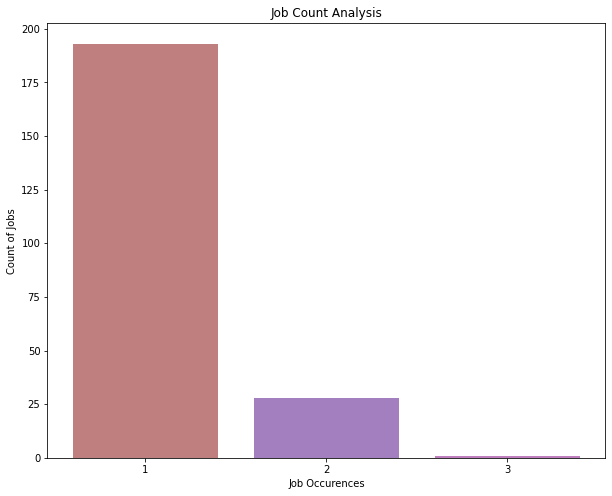

In [ ]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(8)
names = ['1','2','3']
plt.bar(np.arange(len(np.array(jobs_stats['count']))), jobs_stats['count'], color = ['maroon', 'indigo', 'purple'],align='center', alpha=0.5)
plt.xticks(np.arange(len(np.array(jobs_stats['count']))), names)
#plt.xticks(rotation = 90)
plt.xlabel('Job Occurences')
plt.ylabel('Count of Jobs')
plt.title('Job Count Analysis')

plt.show()

In [ ]:
skills_list=[]
for val in skills:
    for keys in val:
        skills_list.append(keys)

print(len(skills_list))
print(skills_list)

1207
['prototyping', 'data', 'training', 'networks', 'processing', 'certifications', 'programming', 'implementation', 'testing', 'technical', 'penetration', 'documentation', 'http', 'tech', 'support', 'ensemble', 'hardware', 'communication', 'ecommerce', 'communication', 'ecommerce', 'design', 'ai', 'mobile', 'diagnostics', 'communication', 'networks', 'implementation', 'troubleshooting', 'electronics', 'processing', 'hardware', 'telecom', 'design', 'designer', 'technical', 'training', 'backend', 'html', 'programming', 'collaboration', 'coding', 'internet', 'development', 'coaching', 'php', 'web', 'communication', 'svg', 'html', 'design', 'git', 'internet', 'angular', 'mobile', 'http', 'nodejs', 'ecommerce', 'communication', 'deep', 'go', 'implementation', 'mining', 'engineering', 'processing', 'design', 'technical', 'ecommerce', 'training', 'machine', 'collection', 'collaboration', 'mathematics', 'innovation', 'learning', 'data', 'mobile', 'communication', 'reporting', 'communication'

In [ ]:
skills_data = pd.DataFrame()
skills_data['skills'] = skills_list
skills_count_data = pd.DataFrame(skills_data['skills'].value_counts())
skills_count_data.rename(columns={'skills' : 'count'}, inplace= True)
skills_count_data['skills'] = skills_count_data.index
skills_count_data.index = range(len(skills_count_data['skills']))
skills_count_data

,count,skills
0,97,communication
1,65,internet
2,58,design
3,55,collaboration
4,55,ensemble
...,...,...
150,1,touch
151,1,shiny
152,1,maven
153,1,eclipse


In [ ]:
countvals = pd.DataFrame(skills_count_data['count'].value_counts())
countvals.rename(columns={'count':'number of skills'}, inplace = True)
countvals['frequency'] = countvals.index
countvals.index = range(len(countvals['frequency']))
countvals

,number of skills,frequency
0,48,1
1,35,2
2,21,3
3,7,6
4,5,4
5,5,5
6,4,33
7,4,14
8,3,10
9,2,13


In [ ]:
countss = skills_count_data['count'].unique()
len(countss)
#countss

28

In [ ]:
# taggies = []
# for cc in countss:
#   id,tags = skills_count_data.loc[skills_count_data['count']==cc]['skills']
#   taggies.append(tags)
# taggies

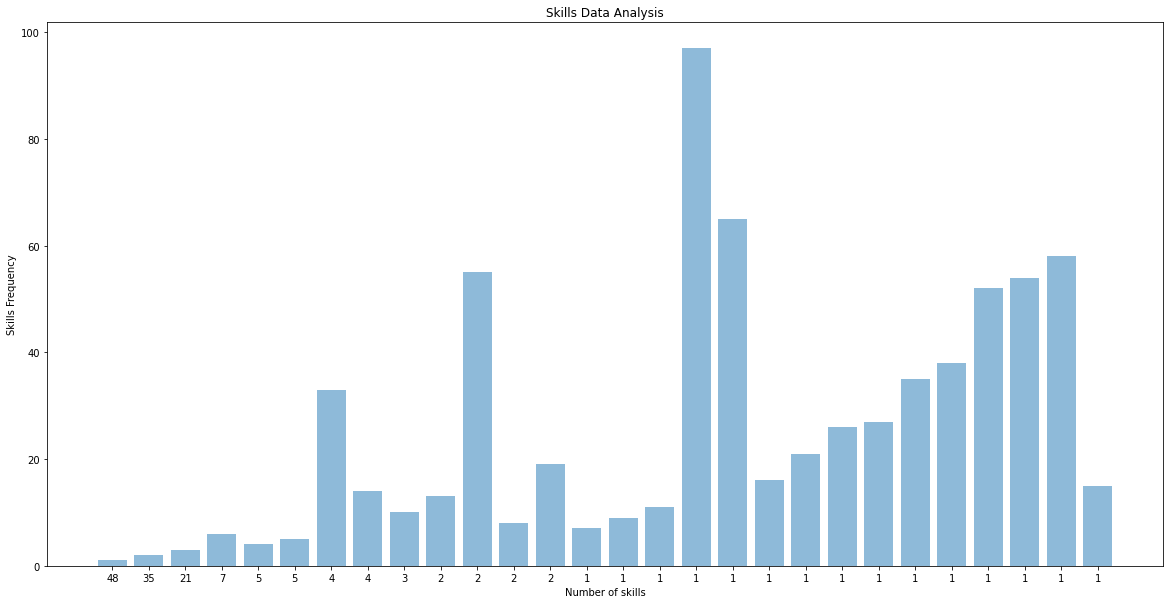

In [ ]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(10)
#names = ['1','2','3']
plt.bar(np.arange(len(np.array(countvals['frequency']))), countvals['frequency'],align='center', alpha=0.5)
plt.xticks(np.arange(len(np.array(countvals['number of skills']))), countvals['number of skills'])
#plt.xticks(rotation = 90)
plt.xlabel('Number of skills')
plt.ylabel('Skills Frequency')
plt.title('Skills Data Analysis')

plt.show()